# Classficication table in python

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

sb.set()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
pkmndata = pd.read_csv('Pokemon.csv')
pkmndata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
pkmndata.describe

<bound method NDFrame.describe of        #                   Name   Type 1  Type 2  Total  HP  Attack  Defense   
0      1              Bulbasaur    Grass  Poison    318  45      49       49  \
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     

## Simple decision tree

In [4]:
legnd = pd.DataFrame(pkmndata['Legendary'])
total = pd.DataFrame(pkmndata['Total'])

In [5]:
#train set 600
total_train = pd.DataFrame(total[:600])
legnd_train = pd.DataFrame(legnd[:600])

#test set 200
total_test = pd.DataFrame(total[-200:])
legnd_test = pd.DataFrame(legnd_train[-200:])

#check sample size
print("Train Set: ", legnd_train.shape, total_train.shape)
print("Test Set: ", legnd_test.shape, total_test.shape)

Train Set:  (600, 1) (600, 1)
Test Set:  (200, 1) (200, 1)


In [6]:
type(legnd_train['Legendary'])

pandas.core.series.Series

In [7]:
print(legnd_train['Legendary'].value_counts())
print(legnd_test['Legendary'].value_counts())
print(total_train['Total'].value_counts())
print(total_test['Total'].value_counts())

Legendary
False    557
True      43
Name: count, dtype: int64
Legendary
False    168
True      32
Name: count, dtype: int64
Total
600    26
405    23
500    18
525    15
300    15
       ..
302     1
467     1
565     1
194     1
509     1
Name: count, Length: 161, dtype: int64
Total
600    11
580     9
335     7
500     5
494     5
       ..
550     1
660     1
313     1
307     1
245     1
Name: count, Length: 102, dtype: int64


<Axes: ylabel='count'>

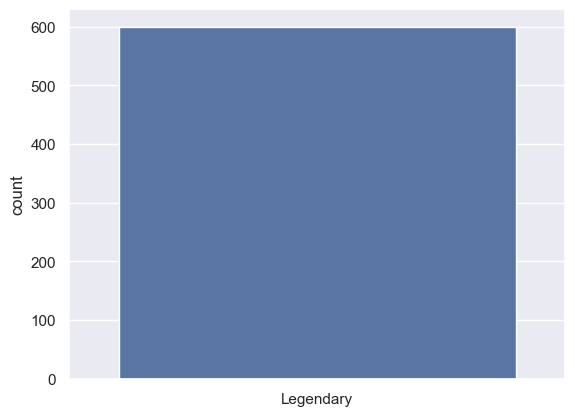

In [8]:
sb.countplot(legnd_train)

<Axes: >

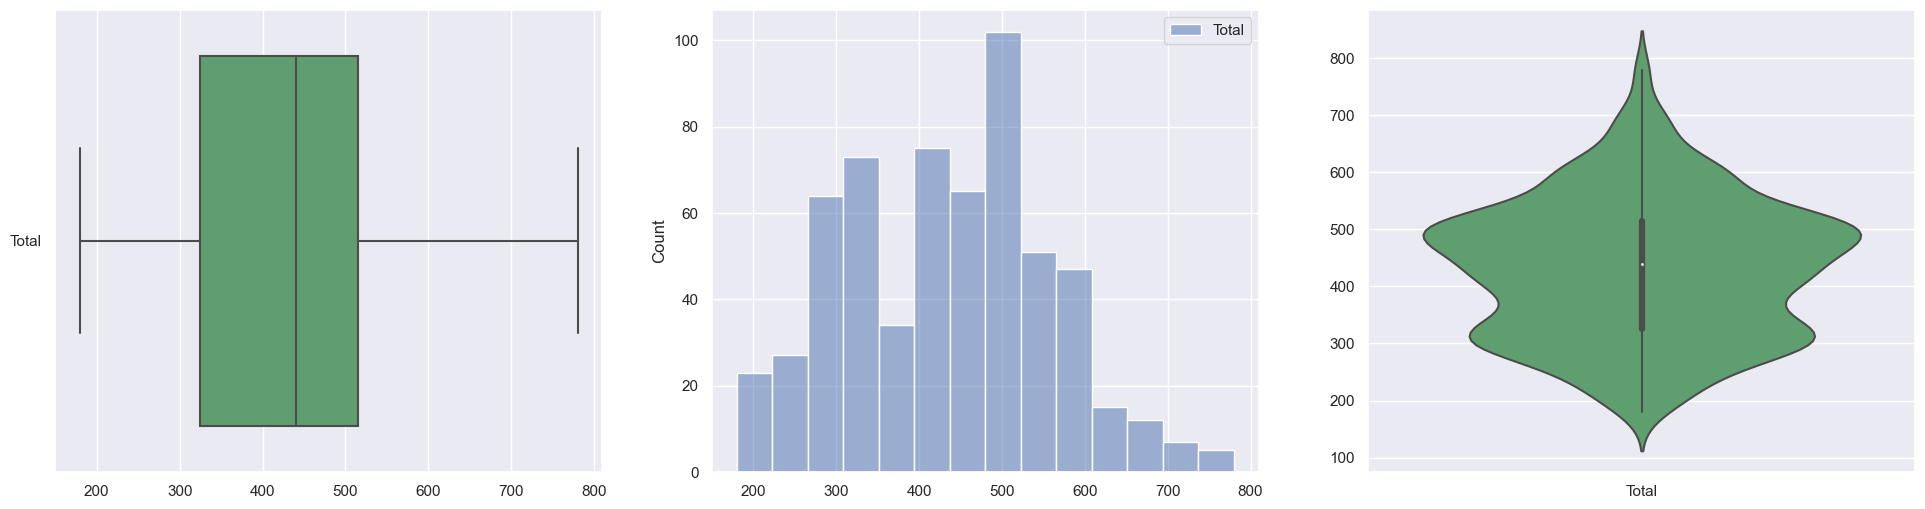

In [9]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(total_train, orient="h", ax=axes[0], color="g")
sb.histplot(total_train, kde=False, ax=axes[1], color="g")
sb.violinplot(total_train, ax=axes[2], color="g")

<Axes: xlabel='Total', ylabel='Legendary'>

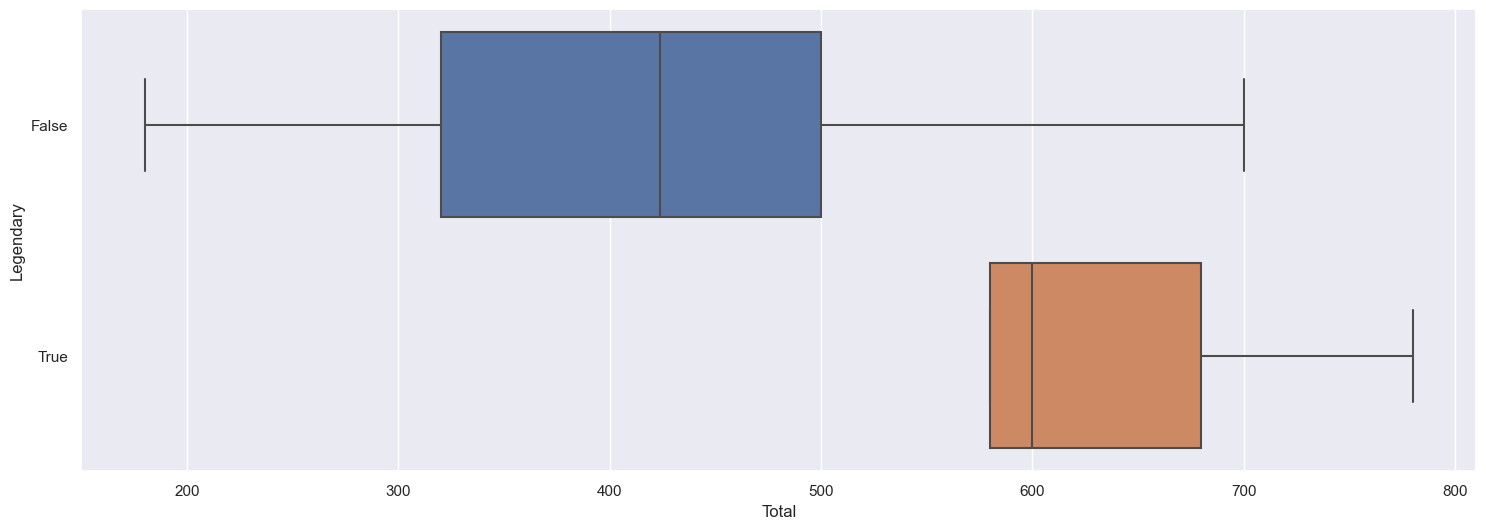

In [10]:
jointdf = pd.concat([total_train, legnd_train], axis=1)

f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x="Total", y="Legendary", data=jointdf, orient="h")

In [65]:
#import decision tree classifier model from scikit-learn
from sklearn.tree import DecisionTreeClassifier

#create a decision tree classifier object
dectree = DecisionTreeClassifier(max_depth=2)

In [66]:
dectree.fit(total_train, legnd_train)

DecisionTreeClassifier(max_depth=2)

from sklearn.tree import export_graphviz

treedot = export_graphviz(dectree,
                          feature_names=total_train.columns,
                          out_file=None,
                          filled=True,
                          rounded=True,
                          special_characters=True)

import graphviz
graphviz.Source(treedot)


Classification Accuracy 	: 0.9516666666666667


<Axes: >

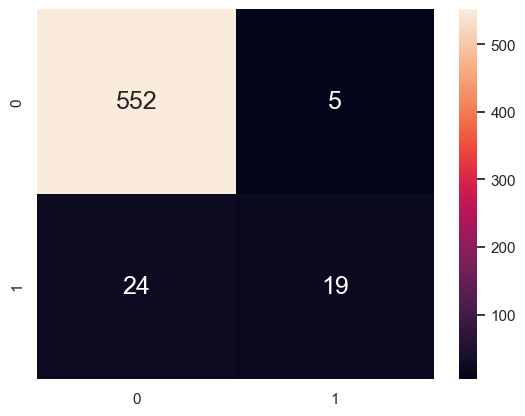

In [68]:
legnd_train_pred = dectree.predict(total_train)

print("Classification Accuracy \t:", dectree.score(total_train, legnd_train))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(legnd_train, legnd_train_pred), annot=True, fmt=".0f", annot_kws={"size":18})

Classification Accuracy 	: 0.795


<Axes: >

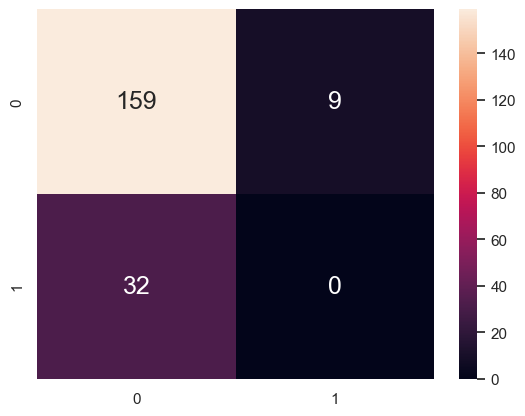

In [69]:
legnd_test_pred = dectree.predict(total_test)

print("Classification Accuracy \t:", dectree.score(total_test, legnd_test))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(legnd_test, legnd_test_pred), annot=True, fmt=".0f", annot_kws={"size":18})